In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import io
import zipfile

In [29]:
# Carga de todos los archivos de zip
with zipfile.ZipFile("dataset/RLCS 2021-22 Dataset.zip") as z:
    games_by_players_df = pd.read_csv(io.StringIO(z.read("games_by_players.csv").decode("utf-8")), low_memory=False)
    games_by_teams_df = pd.read_csv(io.StringIO(z.read("games_by_teams.csv").decode("utf-8")))
    main_df = pd.read_csv(io.StringIO(z.read("main.csv").decode("utf-8")))
    matches_by_players_df = pd.read_csv(io.StringIO(z.read("matches_by_players.csv").decode("utf-8")))
    matches_by_teams_df = pd.read_csv(io.StringIO(z.read("matches_by_teams.csv").decode("utf-8")))
    players_db_df = pd.read_csv(io.StringIO(z.read("players_db.csv").decode("utf-8")))

#DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
#  games_by_players_df = pd.read_csv(io.StringIO(z.read("games_by_players.csv").decode("utf-8")))
# Se desactivará warning, pero se averiguará el inconveniente de la columna

matches_by_teams_df_win = matches_by_teams_df[matches_by_teams_df['winner'].isin([True])].reset_index()

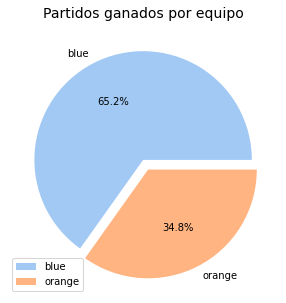

In [30]:
df_rlcs_color_win_color = matches_by_teams_df_win.groupby('color')[['color', 'winner']].sum().reset_index()
fig,ax = plt.subplots(figsize=(12,5))
colors = sns.color_palette('pastel')
explode = (0, 0.1)
plt.pie(df_rlcs_color_win_color.winner,
        labels=df_rlcs_color_win_color.color,
        colors=colors,
        autopct = '%1.1f%%',
        explode = explode)
ax.set_title('Partidos ganados por equipo', fontsize=14, x=0.5)
ax.legend()
plt.show()

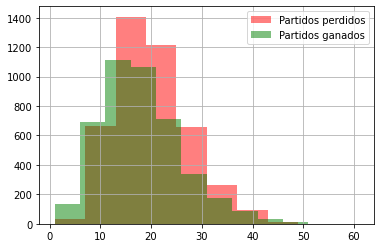

In [31]:
fig,ax = plt.subplots(figsize=(6,4))
matches_by_teams_df[matches_by_teams_df['winner'] == False]['core_saves'].hist(alpha=0.5, label='Partidos perdidos', color='red')
matches_by_teams_df[matches_by_teams_df['winner'] == True]['core_saves'].hist(alpha=0.5, label='Partidos ganados', color='green')
plt.legend()
plt.show()

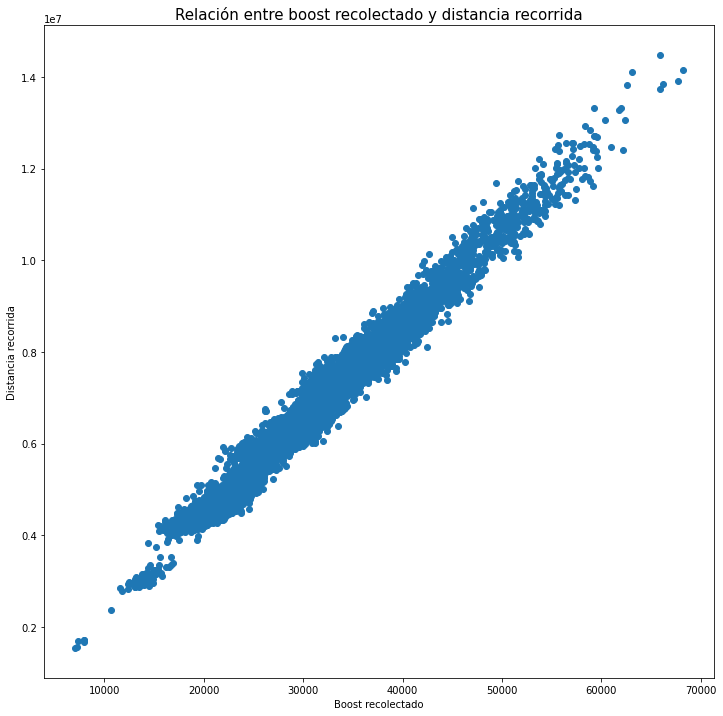

In [32]:
x = matches_by_teams_df['boost_amount_collected']
y = matches_by_teams_df['movement_total_distance']
fig,ax = plt.subplots(figsize=(12,12))
plt.scatter(x=x, y=y)
ax.set_title(label='Relación entre boost recolectado y distancia recorrida', fontsize='15')
plt.xlabel('Boost recolectado')
plt.ylabel('Distancia recorrida')
plt.show()